

Estimated Y-Intercept Coefficient: 
 [0.62958355]


Coefficients: 
 [[ 0.00130416 -0.0005927  -0.00121961 -0.00048995  0.00492892 -0.00100049
   0.00018961  0.0017398  -0.00521309 -0.00045191]]


Average error : 0.6223786841937504
Residual mean squared error with test data:  0.7876203494132424


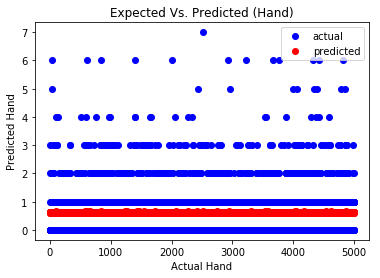


The end score of the model:  0.00022418377743316234


In [2]:
%matplotlib inline

import csv

import numpy as np # linear algebra
import pandas as pd, os, math # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

# seed for reproducible results
pd.set_option('display.max_columns', 600)

#load csv file(dataset)
test_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-testing.data",names=['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5','hand'])
train_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-training-true.data",names=['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5','hand'])

X = train_data.drop(['hand'],axis=1)
y = train_data.hand
Xte = test_data.drop(['hand'],axis=1)
yte = test_data.hand

# Split the data into two parts: training data and testing data
X_train,X_test,y_train,y_test = train_test_split(X,(y[:, np.newaxis]), test_size=0.2, random_state=42)

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#                                          Task to complete                                                      # 
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#=================================================================================================================
# Task 1-1: use linear regression in scikit-learn
#=================================================================================================================

# Creating the linear regression object
regr = linear_model.LinearRegression()

# Training the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
poker_y_pred = regr.predict(X_test)

#=================================================================================================================
# Task 1-2: show intercept and coefficients
#=================================================================================================================

# The Estimated Intercept
print('\n\nEstimated Y-Intercept Coefficient: \n', regr.intercept_)

# The coefficients
print('\n\nCoefficients: \n', regr.coef_)

#=================================================================================================================
# Task 1-3: show errors on training dataset and testing dataset
#=================================================================================================================
avgError = sum([math.fabs(x-y) for x, y in zip(poker_y_pred, y_test)]) / len(poker_y_pred)
print("\n\nAverage error :", avgError)

# The mean squared error w/ test data
rmsError = sum([(x-y)**2 for x, y in zip(poker_y_pred, y_test)]) / len(poker_y_pred)
rmsError = math.sqrt(rmsError)
print("Residual mean squared error with test data: ", rmsError)

#=================================================================================================================
# Task 1-4: show plot a figure to show your predictions and real prices on the testing dataset
#=================================================================================================================

plt.plot(y_test, 'bo', label='actual')
plt.plot(poker_y_pred, 'ro', label='predicted')
plt.xlabel('Actual Hand')
plt.ylabel('Predicted Hand')
plt.title('Expected Vs. Predicted (Hand)')
plt.legend()
plt.show()

#=================================================================================================================
# Task 1-5: End result and conclusion(Output final score of model and percent accuracy)
#=================================================================================================================

print('\nThe end score of the model: ', regr.score(X_train, y_train))
